#### Rainfall Weather Forecasting

##### Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
###### Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Description:
Number of columns: 23

1. Date  - The date of observation
2. Location  -The common name of the location of the weather station
3. MinTemp  -The minimum temperature in degrees celsius
4. MaxTemp -The maximum temperature in degrees celsius
5. Rainfall  -The amount of rainfall recorded for the day in mm
6. Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine  -The number of hours of bright sunshine in the day.
8. WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
9. WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10. WindDir9am -Direction of the wind at 9am
11. WindDir3pm -Direction of the wind at 3pm
12. WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
13. WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
14. Humidity9am -Humidity (percent) at 9am
15. Humidity3pm -Humidity (percent) at 3pm
16. Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
17. Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
18. Cloud9am - Fraction of sky obscured by cloud at 9am. 
19. Cloud3pm -Fraction of sky obscured by cloud 
20. Temp9am-Temperature (degrees C) at 9am
21. Temp3pm -Temperature (degrees C) at 3pm
22. RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
23. RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [1]:
# importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset from the system
rain_data = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
rain_data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


The dataset contains about 10 years of daily weather observations from different locations across Australia. In this project, We will predict whether or not it will rain the next day and the total amount of rainfall(mm).

In [4]:
rain_data.shape

(8425, 23)

The dataset contains 8425 rows and 23 different attributes.

In [5]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

1. The dataset contains missing data or null values.
2. The dataset contains numerical as well as categorical columns.

In [6]:
# numerical columns only
rain_data.describe(exclude=np.object).T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


In [7]:
# categorical columns only
rain_data.describe(exclude=np.number).T

,count,unique,top,freq
Date,8425,3004,2011-05-21,5
Location,8425,12,Melbourne,1622
WindGustDir,7434,16,N,713
WindDir9am,7596,16,N,906
WindDir3pm,8117,16,SE,813
RainToday,8185,2,No,6195
RainTomorrow,8186,2,No,6195


In [8]:
# converting date column to datatime format
rain_data['Date'] = pd.to_datetime(rain_data['Date'])

In [9]:
rain_data.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [10]:
# finding all the categorical and numerical values

categorical, numerical=[],[]

for i in rain_data.columns:
    if rain_data[i].dtype == 'object':
        categorical.append(i)
    if rain_data[i].dtype == 'float64':
        numerical.append(i)
        
print("Categorical Columns :")
print(categorical)
print()
print("Numerical Columns :")
print(numerical)

Categorical Columns :
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Numerical Columns :
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [11]:
# unique values in each column
rain_data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [12]:
# number of null values in each column
rain_data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [13]:
# checking for percentage of null values in each column
(rain_data.isnull().sum()/len(rain_data))*100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [14]:
# Fill null values in numerical columns with median
for col in numerical:
    rain_data[col].fillna(rain_data[col].median(), inplace=True)

# Fill null values in categorical columns with mode
for col in categorical:
    rain_data[col].fillna(rain_data[col].mode()[0], inplace=True)

In [15]:
# checking for percentage of null values in each column
(rain_data.isnull().sum()/len(rain_data))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [16]:
rain_data.drop_duplicates(subset = None, keep='first', inplace=True, ignore_index=False)
rain_data.shape

(6762, 23)

In [17]:
for i in categorical:
    print(i + ":")
    print(rain_data[i].value_counts())
    print()

Location:
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64

WindGustDir:
N      1401
E       518
SW      465
W       434
WSW     420
WNW     398
SSE     390
S       376
SE      370
ENE     357
NE      300
SSW     299
NW      296
NNE     287
ESE     267
NNW     184
Name: WindGustDir, dtype: int64

WindDir9am:
N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: WindDir9am, dtype: int64

WindDir3pm:
SE     971
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: WindDir3pm, dtype: int64

RainToday:
No 

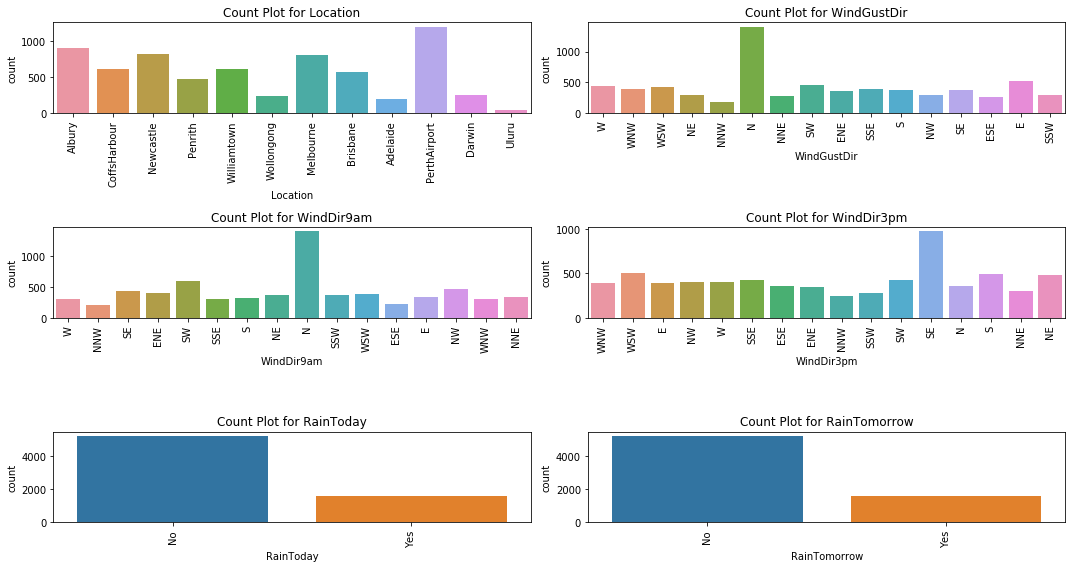

In [18]:
# Calculate the number of rows and columns for subplots
num_rows = (len(categorical) // 2) 
num_cols = 2  # 2 columns per row

# Create subplots
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Iterate through the categorical columns and create count plots in subplots
for i, col in enumerate(categorical):
    row = i // num_cols
    col_num = i % num_cols
    sns.countplot(data=rain_data, x=col, ax=ax[row, col_num])
    ax[row, col_num].set_title(f'Count Plot for {col}')
    ax[row, col_num].set_xticklabels(ax[row, col_num].get_xticklabels(), rotation=90)  # Rotate x-axis labels for readability

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

1. Melbourne has the highest number of data points, with 1622 records and Uluru has the lowest number of data points, with only 39 records.
2. Wind Gust is the highest in North direction.
3. North is the most common wind direction at 9am and for 3 pm South-East is the most common.
4. "No" is the dominant category in both columns(RainToday, RainTomorrow), indicating that most days do not have rain or are not predicted to have rain.
5. There is a class imbalance, with "Yes" occurring less frequently, suggesting that the dataset might be imbalanced regarding rainy days.

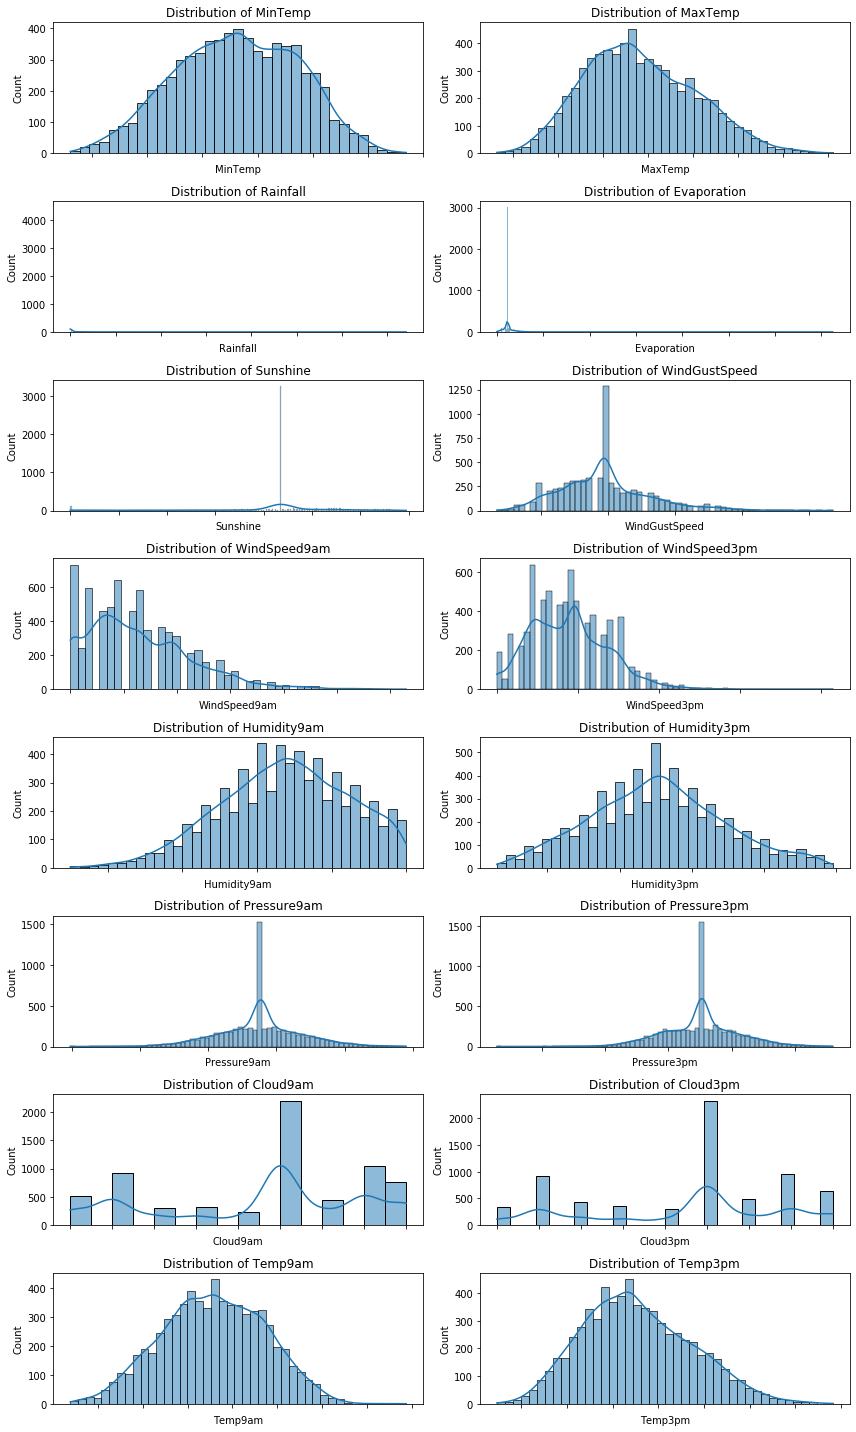

In [19]:
# Calculate the number of rows and columns for subplots
num_rows = (len(numerical) // 2) 
cols = 2 # 2 columns per row

# Create subplots
fig, ax = plt.subplots(num_rows, cols, figsize=(12, 20))

# Iterate through the categorical columns and create count plots in subplots
for i, col in enumerate(numerical):
    row = i // cols
    col_num = i % cols
    sns.histplot(data=rain_data, x=col, ax=ax[row, col_num], kde=True)
    ax[row, col_num].set_title(f'Distribution of {col}')
    ax[row, col_num].set_xticklabels(ax[row, col_num].get_xticklabels(), rotation=90)  # Rotate x-axis labels for readability

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

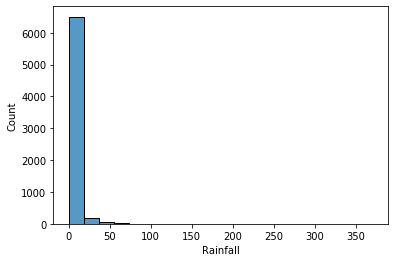

In [20]:
sns.histplot(data=rain_data, x='Rainfall', bins=20)

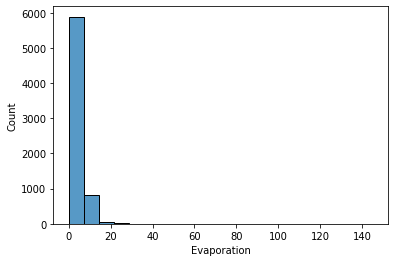

In [21]:
sns.histplot(data=rain_data, x='Evaporation', bins=20)

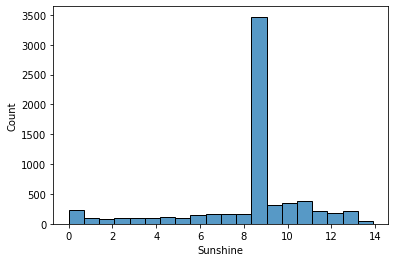

In [22]:
sns.histplot(data=rain_data, x='Sunshine', bins=20)

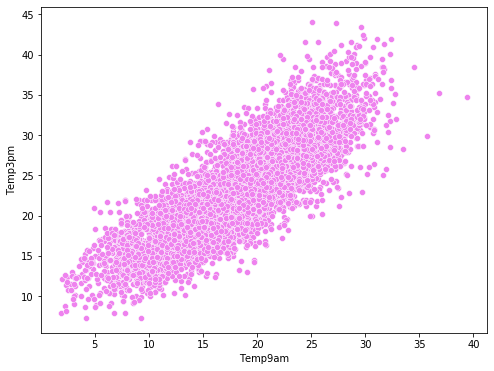

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Temp9am', y='Temp3pm', data=rain_data, color='violet')

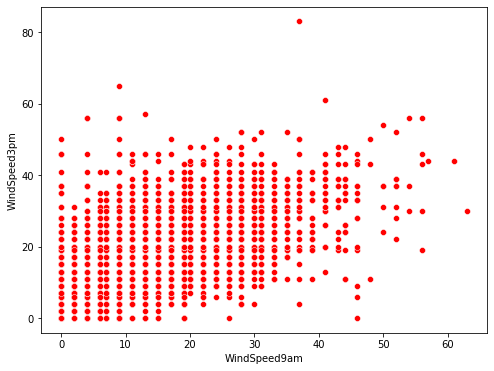

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='WindSpeed9am', y='WindSpeed3pm', data=rain_data, color='red')

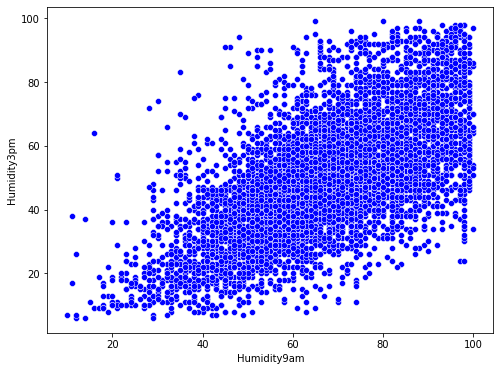

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Humidity9am', y='Humidity3pm', data=rain_data, color='blue')

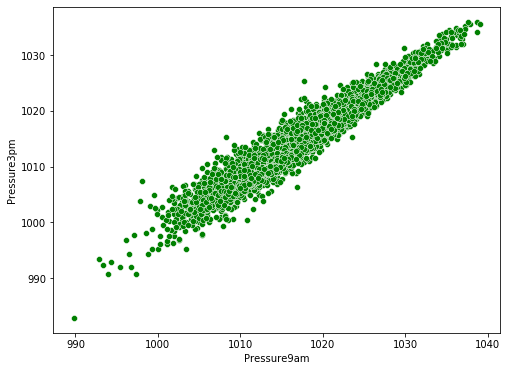

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Pressure9am', y='Pressure3pm', data=rain_data, color='green')

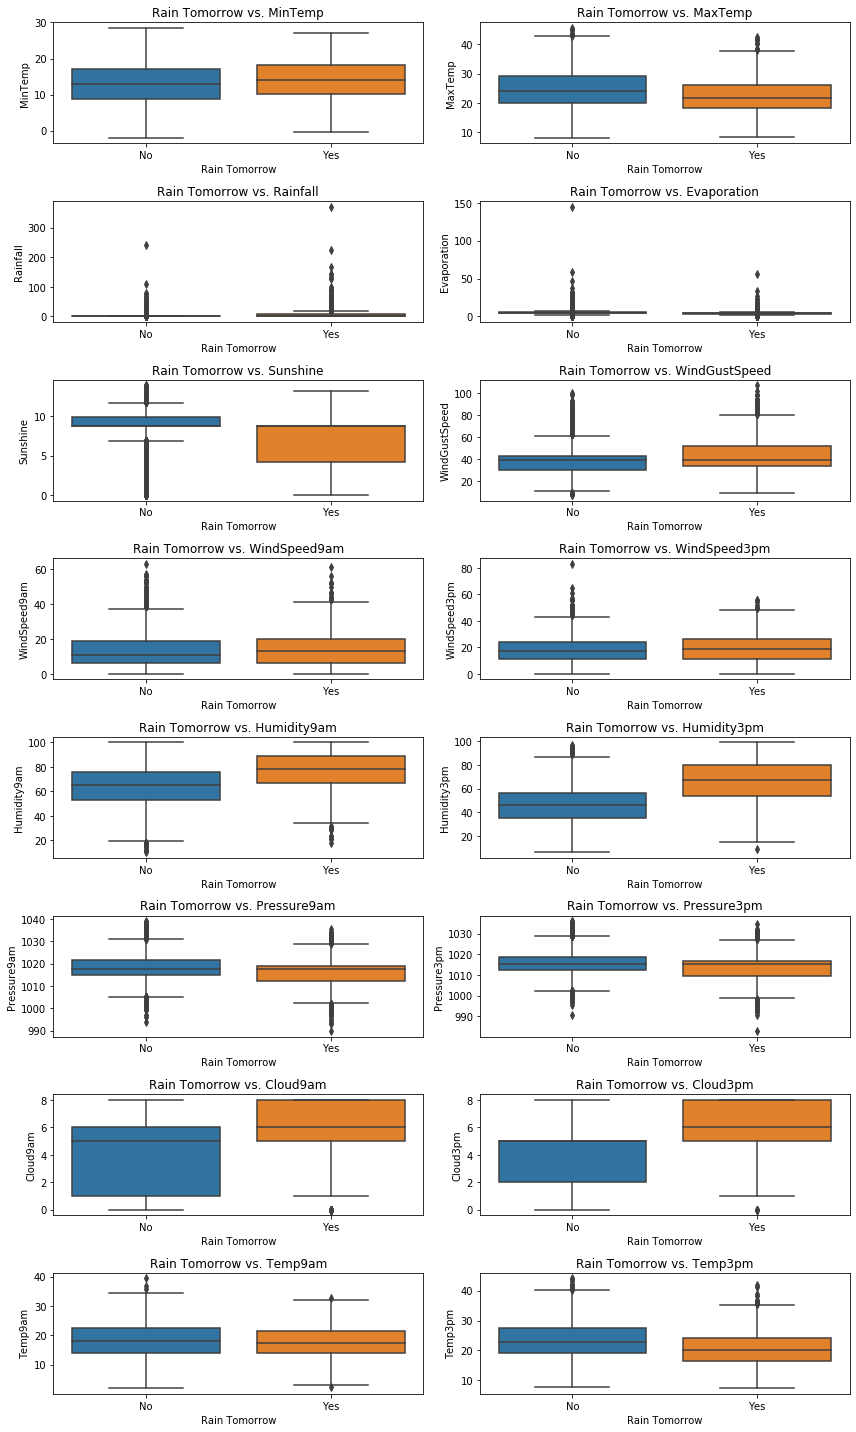

In [27]:
# Calculate the number of rows and columns for subplots
num_rows = (len(numerical) // 2) 
cols = 2 # 2 columns per row

# Create subplots
fig, ax = plt.subplots(num_rows, cols, figsize=(12, 20))

# Iterate through the categorical columns and create count plots in subplots
for i, col in enumerate(numerical):
    row = i // cols
    col_num = i % cols
    sns.boxplot(data=rain_data, x='RainTomorrow', y=col, ax=ax[row, col_num])
    ax[row, col_num].set_title("Rain Tomorrow vs. {}".format(col))
    ax[row, col_num].set_xlabel("Rain Tomorrow")
    ax[row, col_num].set_ylabel(col)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

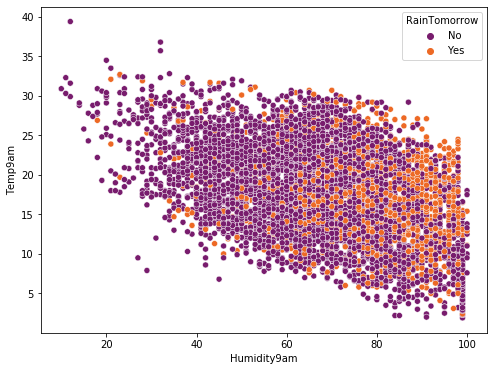

In [28]:
plt.figure(figsize = (8,6))
sns.scatterplot(x='Humidity9am', y='Temp9am', hue='RainTomorrow' , palette='inferno', data=rain_data)

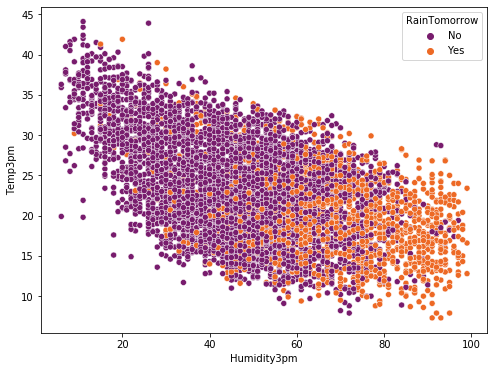

In [29]:
plt.figure(figsize = (8,6))
sns.scatterplot(x='Humidity3pm', y='Temp3pm', hue='RainTomorrow' , palette='inferno', data=rain_data)

Rain predictions at any time is when humidity is high and temperatures are low.

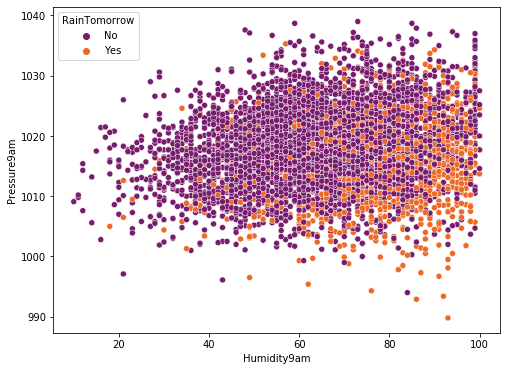

In [30]:
plt.figure(figsize = (8,6))
sns.scatterplot(x='Humidity9am', y='Pressure9am', hue='RainTomorrow' , palette='inferno', data=rain_data)

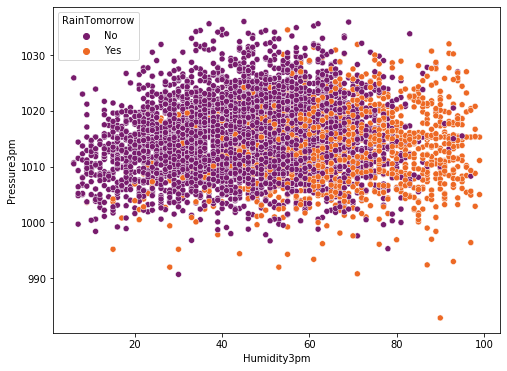

In [31]:
plt.figure(figsize = (8,6))
sns.scatterplot(x='Humidity3pm', y='Pressure3pm', hue='RainTomorrow' , palette='inferno', data=rain_data)

High humidity and high pressure at any time for rainfall forecast.

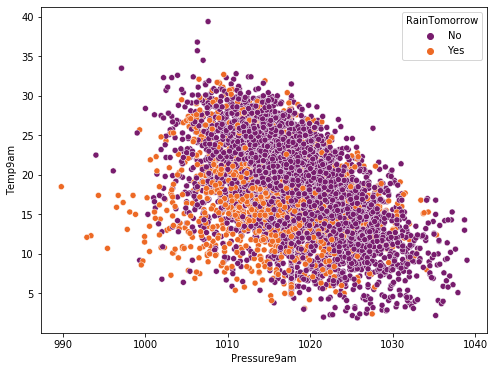

In [32]:
plt.figure(figsize = (8,6))
sns.scatterplot(x='Pressure9am', y='Temp9am', hue='RainTomorrow' , palette='inferno', data=rain_data)

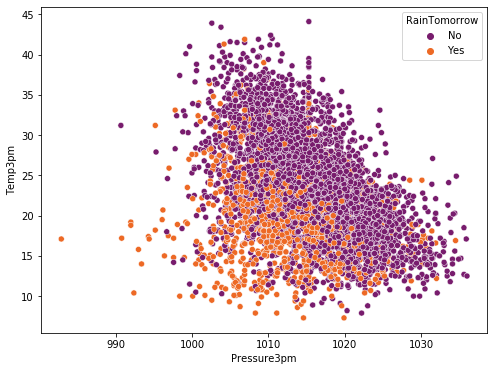

In [33]:
plt.figure(figsize = (8,6))
sns.scatterplot(x='Pressure3pm', y='Temp3pm', hue='RainTomorrow' , palette='inferno', data=rain_data)

Low pressure and low temperature for rainfall at any time.

In [34]:
# using label encoder to convert categorical column to numerical in dataset
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical:
    rain_data[col] = label_encoder.fit_transform(rain_data[col])

# Display the updated dataset
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.9,0.6,4.6,8.7,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,1,7.4,25.1,0.0,4.6,8.7,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,1,12.9,25.7,0.0,4.6,8.7,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,1,9.2,28.0,0.0,4.6,8.7,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,1,17.5,32.3,1.0,4.6,8.7,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


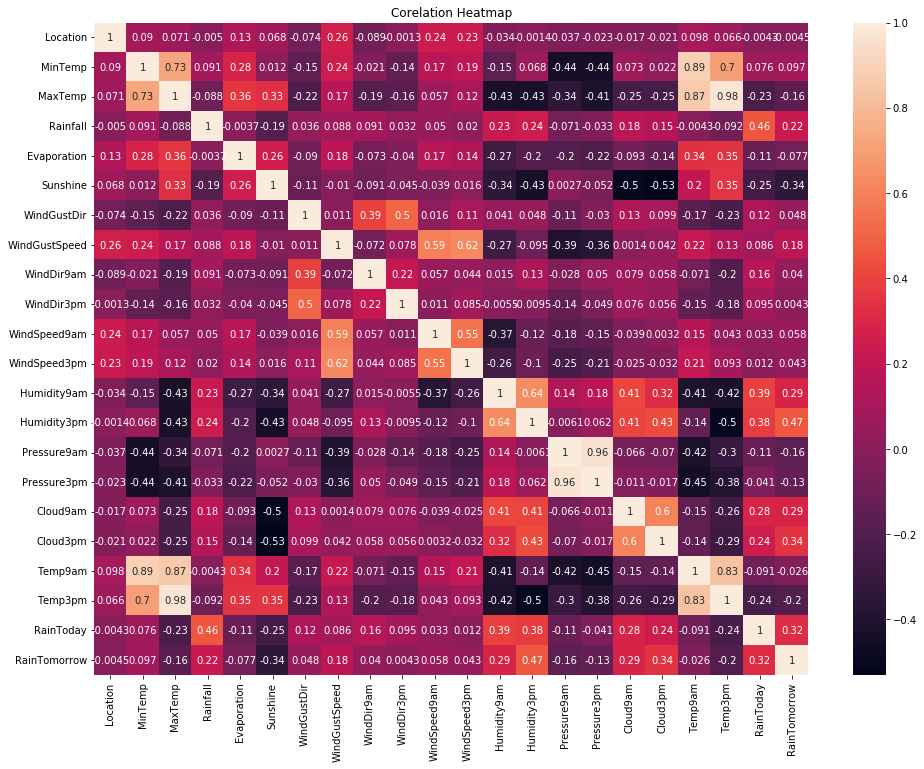

In [35]:
# lets check for correlation among columns

plt.figure(figsize=(16,12))
sns.heatmap(rain_data.corr(), annot=True)
plt.title("Corelation Heatmap")
plt.show()

In [36]:
rain_data.corr()['RainTomorrow'].sort_values()

Sunshine        -0.341003
Temp3pm         -0.202707
MaxTemp         -0.159976
Pressure9am     -0.159059
Pressure3pm     -0.131641
Evaporation     -0.077340
Temp9am         -0.025806
Location        -0.004506
WindDir3pm       0.004301
WindDir9am       0.040399
WindSpeed3pm     0.043075
WindGustDir      0.048487
WindSpeed9am     0.057958
MinTemp          0.097202
WindGustSpeed    0.184432
Rainfall         0.223599
Cloud9am         0.285715
Humidity9am      0.287808
RainToday        0.323691
Cloud3pm         0.344434
Humidity3pm      0.466778
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

In [37]:
rain_data.corr()['Rainfall'].sort_values()

Sunshine        -0.191051
Temp3pm         -0.091744
MaxTemp         -0.087556
Pressure9am     -0.071052
Pressure3pm     -0.032647
Location        -0.004972
Temp9am         -0.004344
Evaporation     -0.003746
WindSpeed3pm     0.020109
WindDir3pm       0.031770
WindGustDir      0.035572
WindSpeed9am     0.050325
WindGustSpeed    0.088131
MinTemp          0.091021
WindDir9am       0.091260
Cloud3pm         0.151333
Cloud9am         0.184536
RainTomorrow     0.223599
Humidity9am      0.227943
Humidity3pm      0.242929
RainToday        0.461817
Rainfall         1.000000
Name: Rainfall, dtype: float64

In [38]:
from sklearn.feature_selection import SelectKBest, chi2
X = rain_data.drop(["RainTomorrow", 'Date'], axis=1)
y = rain_data['RainTomorrow']

In [39]:
# finding and transforming outliers
# Iterate over each column in X
for col in X.columns:
    # Calculate the lower and upper thresholds for the column
    Q1 = np.percentile(X[col], 25)
    Q3 = np.percentile(X[col], 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Replace outliers in the column with threshold values
    X[col] = np.where(X[col] < lower_threshold, lower_threshold, X[col])
    X[col] = np.where(X[col] > upper_threshold, upper_threshold, X[col])

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# scaling the dataset
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X_s,y, test_size=0.30, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (4733, 21)
X_test shape (2029, 21)
y_train shape (4733,)
y_test shape (2029,)


In [42]:
# using SMOTE to curb ata imbalance problem
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [43]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (7278, 21)
X_test shape (2029, 21)
y_train shape (7278,)
y_test shape (2029,)


In [44]:
from sklearn.metrics import (confusion_matrix, classification_report,accuracy_score,f1_score,precision_score,recall_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

models = [
    ('KNeighbors', KNeighborsClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier(n_estimators=100)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100)),
    ('SVM', SVC()),
    ('NaiveBayes', GaussianNB()),
    ('LogisticRegression', LogisticRegression())]

scores_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

for name, model in models:
    print("Model: ", str(model))
    print("\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    # Calculate the scores
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Add scores to the DataFrame
    scores_df = scores_df.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}, ignore_index=True)

print(scores_df)


Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


[[1167  384]
 [ 123  355]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1551
           1       0.48      0.74      0.58       478

   micro avg       0.75      0.75      0.75      2029
   macro avg       0.69      0.75      0.70      2029
weighted avg       0.80      0.75      0.77      2029

Model:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


[[1274  277]
 [ 203  275]]
              precision    recall  f1-score   support

           0       0.86    

Random Forest appears to be the best-performing model on the dataset.

In [45]:
# checking cv score for different classifiers
for name, model in models:
    cv_score = cross_val_score(model, X_s, y, cv=5, scoring='accuracy')
    accuracy = accuracy_score(y_test, y_pred)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Difference between accuracy and cv score is: ", accuracy-cv_score.mean())
    print("\n")

Model : KNeighbors
cv_score : [0.84478936 0.68144863 0.75887574 0.81213018 0.82174556]
Mean Score 0.783797893788513
Difference between accuracy and cv score is:  0.01659638910946637


Model : DecisionTree
cv_score : [0.7390983  0.63118995 0.64866864 0.67085799 0.80029586]
Mean Score 0.6980221467088259
Difference between accuracy and cv score is:  0.10237213618915342


Model : RandomForest
cv_score : [0.84552846 0.76348854 0.76997041 0.72189349 0.84985207]
Mean Score 0.7901465951184525
Difference between accuracy and cv score is:  0.010247687779526782


Model : AdaBoost
cv_score : [0.83739837 0.77309682 0.76035503 0.71227811 0.83653846]
Mean Score 0.7839333586988371
Difference between accuracy and cv score is:  0.016460924199142246


Model : SVM
cv_score : [0.86474501 0.80118256 0.77884615 0.83505917 0.84837278]
Mean Score 0.8256411349750937
Difference between accuracy and cv score is:  -0.025246852077114412


Model : NaiveBayes
cv_score : [0.77753141 0.76644494 0.68047337 0.78920118 0.

1. Random Forest appears to be the best-performing model with the highest mean cross-validation score and a small difference between accuracy and cross-validation score.
2. SVM and Logistic Regression show signs of overfitting due to the negative differences between accuracy and cross-validation scores

**Random Forest has one of the highest accuracy scores (84.03%) among the models, indicating good predictive performance. It also achieves a high F1 score (83.87%), precision score (83.75%), recall score (84.03%) and maintains a strong performance with a mean cross-validation score of approximately 79.01%, and the difference between accuracy and cross-validation score is relatively small (around 0.0102) as well.**

In [47]:
# hyper parameter tuning on RFR
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
# Get the best parameters and the best score
print("best_params",grid_search.best_params_)
print()
print("best_score",grid_search.best_score_)

best_params {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

best_score 0.9032701291563616


In [49]:
# final model
RainTom_final = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
RainTom_final.fit(X_train, y_train)
RainTom_final_pred = RainTom_final.predict(X_test)
print("Accuracy_final :", accuracy_score(y_test,RainTom_final_pred)*100)

Accuracy_final : 83.98225726959093


Area : 0.8735591021044595


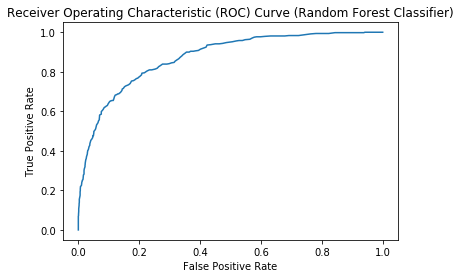

AUC_Score : 0.77003701215844


In [50]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# calculating predicted probabilities for the positive class
y_pred_probs = RainTom_final.predict_proba(X_test)[:, 1]

#Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr,tpr)
print("Area :",roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest Classifier)')
plt.show()

# Calculate the AUC-ROC score using roc_auc_score
auc_score = roc_auc_score(y_test, RainTom_final_pred)
print("AUC_Score :",auc_score)

In [52]:
# saving the model
import joblib
joblib.dump(RainTom_final, "Rain_Tomorrow_Prediction.pkl")

['Rain_Tomorrow_Prediction.pkl']

In [53]:
# predicting on the X_test with the saved model
#loading the aved model
model = joblib.load("Rain_Tomorrow_Prediction.pkl")

# prediction
prediction = model.predict(X_test)
prediction[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
# comparing actual values and predicted values
pred = pd.DataFrame({'predicted':prediction, 'actual':y_test})
pred.head(10)

,predicted,actual
7659,0,0
6545,1,0
2955,0,0
2303,0,0
496,0,0
2860,0,0
1174,0,1
3135,0,0
3058,0,1
5192,0,0


Predicting 'Rainfall' is a regression problem.

In [70]:
# splitting the data into X and y
X = rain_data.drop(['Rainfall','Date'], axis=1)
y = rain_data['Rainfall']

In [71]:
# finding and transforming outliers
# Iterate over each column in X
for col in X.columns:
    # Calculate the lower and upper thresholds for the column
    Q1 = np.percentile(X[col], 25)
    Q3 = np.percentile(X[col], 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Replace outliers in the column with threshold values
    X[col] = np.where(X[col] < lower_threshold, lower_threshold, X[col])
    X[col] = np.where(X[col] > upper_threshold, upper_threshold, X[col])

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# scaling the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)


X_train shape (4733, 21)
X_test shape (2029, 21)
y_train shape (4733,)
y_test shape (2029,)


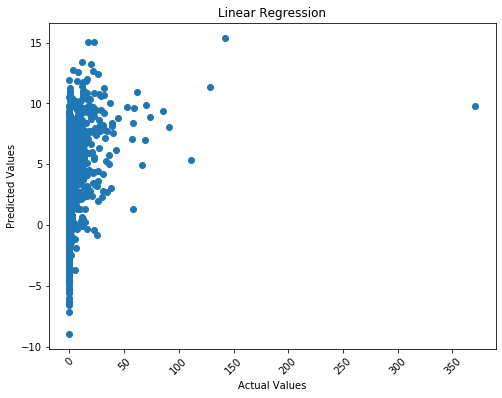

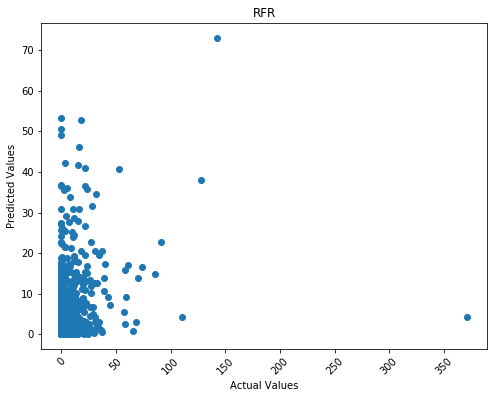

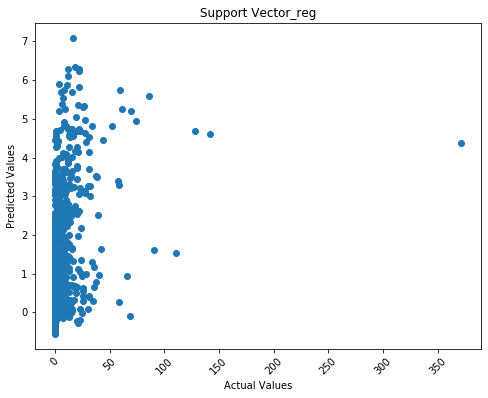

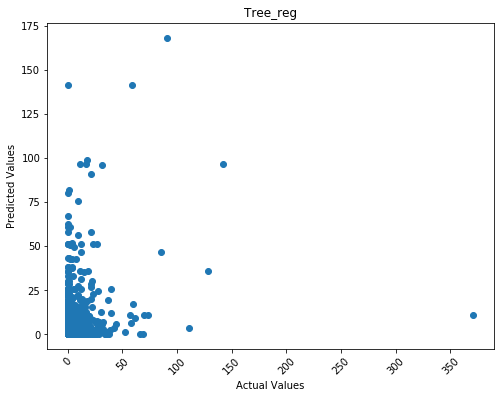

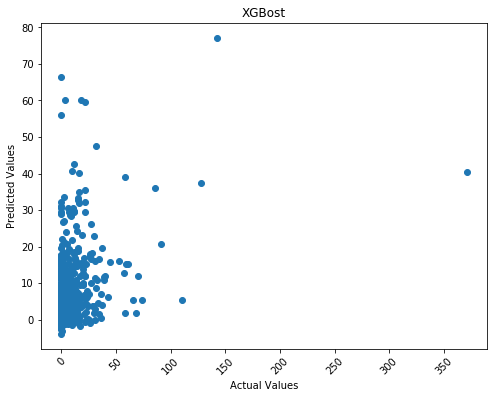

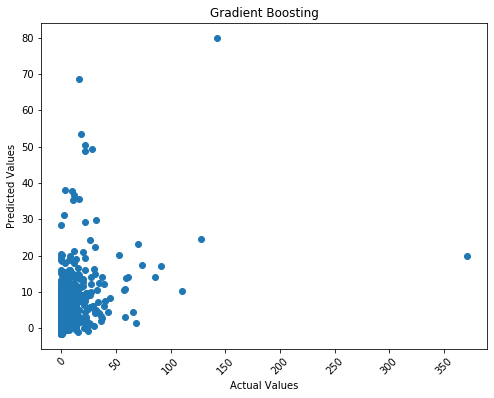

In [75]:
# Import the necessary libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create a list of tuples for the models
models = [
    ('Linear Regression', LinearRegression()),
    ('RFR', RandomForestRegressor()),
    ('Support Vector_reg', SVR()),
    ('Tree_reg', DecisionTreeRegressor()),
    ('XGBost', XGBRegressor()),
    ('Gradient Boosting',GradientBoostingRegressor())
]

predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append((name, y_pred))

# Plotting the predicted vs actual values
for name, y_pred in predictions:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(name)
    plt.xticks(rotation=45)
    plt.show()

In [76]:
metrics = []
for name, y_pred in predictions:
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append((name, r2, mse, rmse, mae))

# Creating metrics dataframe
metrics_df = pd.DataFrame(metrics, columns=['Model_name', 'R2_score', 'Mean_Squared_Error',
                                            'Root_Mean_Squared_Error', 'Mean_Absolute_Error'])

metrics_df

,Model_name,R2_score,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error
0,Linear Regression,0.095782,133.002076,11.532653,4.063917
1,RFR,0.068959,136.947586,11.702461,3.721036
2,Support Vector_reg,0.033317,142.190195,11.924353,2.710460
3,Tree_reg,-0.352563,198.949591,14.104949,4.436668
4,XGBost,0.160777,123.441889,11.110441,3.722915
5,Gradient Boosting,0.173267,121.604753,11.027455,3.411376


R2 score is very low for all the models.